In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading  database
df=pd.read_excel('covid19_clinical_dataset11.xls')
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Name of the columns
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [4]:
# Shape of the database 
df.shape

(5644, 111)

In [5]:
#information of the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(71), int64(4), object(36)
memory usage: 4.8+ MB


In [6]:
#datatypes
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [7]:
df.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


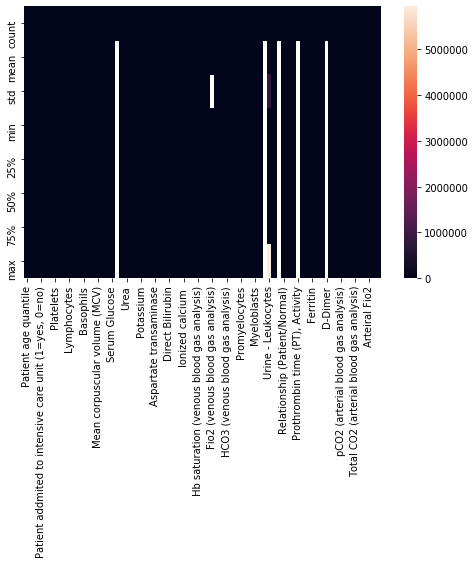

In [8]:
# Making  heatmap of describe.
plt.figure(figsize=(8,5))
sns.heatmap(df.describe())

In [9]:
#Finding Correlation of the variables
df.corr()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient age quantile,1.000000,0.046166,0.015736,-0.035772,0.096808,0.060320,-0.158683,0.119449,-0.037510,-0.125935,...,-0.223949,-0.469049,0.570445,0.570755,0.086133,0.166245,-0.098422,-0.334562,-0.511705,-0.061265
"Patient addmited to regular ward (1=yes, 0=no)",0.046166,1.000000,-0.011264,-0.010192,-0.087241,-0.091867,-0.183091,-0.013134,-0.053143,-0.095313,...,0.198186,-0.226778,0.033456,0.203640,-0.159803,-0.133434,0.105608,-0.173663,NaN,0.273102
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.015736,-0.011264,1.000000,-0.008087,-0.182215,-0.177142,0.006966,-0.023475,-0.137951,-0.110574,...,-0.559117,0.113153,-0.226234,-0.178971,-0.112624,-0.136503,-0.338690,-0.091269,0.185231,-0.049042
"Patient addmited to intensive care unit (1=yes, 0=no)",-0.035772,-0.010192,-0.008087,1.000000,-0.183850,-0.178878,0.125953,-0.073511,-0.120659,-0.109867,...,0.351994,0.298040,0.203506,-0.179731,0.424729,0.410957,0.155628,0.348072,0.129927,-0.383220
Hematocrit,0.096808,-0.087241,-0.182215,-0.183850,1.000000,0.968447,-0.082296,0.083580,0.872987,0.002035,...,-0.046283,-0.180164,-0.195979,0.063842,-0.343724,-0.340215,0.124125,0.066204,0.172490,0.878029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCO3 (arterial blood gas analysis),0.166245,-0.133434,-0.136503,0.410957,-0.340215,-0.420707,0.133917,0.266651,-0.267605,0.012786,...,-0.348558,0.513884,0.644222,-0.209320,0.992877,1.000000,-0.302613,0.104921,-1.000000,-0.434762
pO2 (arterial blood gas analysis),-0.098422,0.105608,-0.338690,0.155628,0.124125,0.081471,-0.138133,-0.226406,0.200226,0.057973,...,0.796438,-0.296518,-0.093285,0.200313,-0.314796,-0.302613,1.000000,-0.194277,-1.000000,0.270951
Arteiral Fio2,-0.334562,-0.173663,-0.091269,0.348072,0.066204,-0.003308,0.471555,0.079731,-0.257630,0.226611,...,-0.018400,0.400575,-0.262126,-0.387237,0.168055,0.104921,-0.194277,1.000000,1.000000,-0.212128
Phosphor,-0.511705,NaN,0.185231,0.129927,0.172490,0.259642,0.125356,-0.221918,0.189551,0.109370,...,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000


In [10]:
#finding null values in the database
df.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [11]:
df.fillna(0, inplace = True)

In [12]:
#finding null values in the database
df.isnull().sum()

Patient ID                                               0
Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
                                                        ..
HCO3 (arterial blood gas analysis)                       0
pO2 (arterial blood gas analysis)                        0
Arteiral Fio2                                            0
Phosphor                                                 0
ctO2 (arterial blood gas analysis)                       0
Length: 111, dtype: int64

In [13]:
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a46b4402a0e5696,8,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f7d619a94f97c45,5,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,d9e41465789c2b5,15,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5640,517c2834024f3ea,17,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5641,5c57d6037fe266d,4,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5642,c20c44766f28291,10,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Unique values of all columns
for col in df:
    print(col)
    print(df[col].unique())
    print('')

Patient ID
['44477f75e8169d2' '126e9dd13932f68' 'a46b4402a0e5696' ...
 '5c57d6037fe266d' 'c20c44766f28291' '2697fdccbfeb7f7']

Patient age quantile
[13 17  8  5 15  9 16  1 14 11  0  3 10  6 12 19  7 18  2  4]

SARS-Cov-2 exam result
['negative' 'positive']

Patient addmited to regular ward (1=yes, 0=no)
[0 1]

Patient addmited to semi-intensive unit (1=yes, 0=no)
[0 1]

Patient addmited to intensive care unit (1=yes, 0=no)
[0 1]

Hematocrit
[ 0.          0.23651545 -1.57168221 -0.74769306  0.99183822  0.19073813
  1.0147264   0.7400642  -0.6790275   0.80872977 -0.10681316  1.42672145
  0.71717513  0.9460609   0.62562132 -0.15259048  0.67139781 -0.22125603
 -0.81635946 -0.65613931 -0.51880735  0.44251209 -0.54169643 -0.45014176
  1.22072399  0.28229275  0.69428688 -0.86213595  0.579844    0.03051793
 -0.03814762 -1.29701912 -1.98367643  1.03761554  2.09048939 -0.40436444
  0.76295245  1.49538696 -0.70191664 -1.36568463 -1.06813335  1.10628104
 -0.38147622  1.17494667  0.305181   -0.793

In [15]:
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a46b4402a0e5696,8,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f7d619a94f97c45,5,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,d9e41465789c2b5,15,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5640,517c2834024f3ea,17,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5641,5c57d6037fe266d,4,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5642,c20c44766f28291,10,negative,0,0,0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


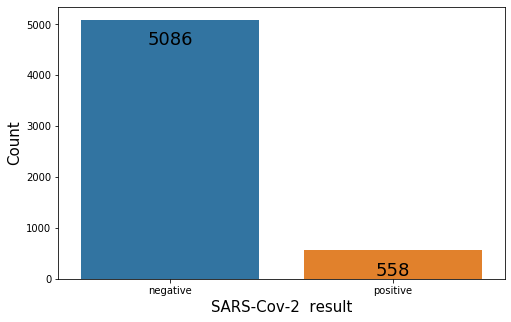

In [40]:
# Countplot of SARS-Cov-2 exam result
plt.figure(figsize=(8,5))
pd =sns.countplot(x = 'SARS-Cov-2 exam result' ,  data=df )
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -20), 
                   textcoords = 'offset points')

plt.xlabel("SARS-Cov-2  result", size=15)
plt.ylabel("Count" ,size=15)
plt.show()


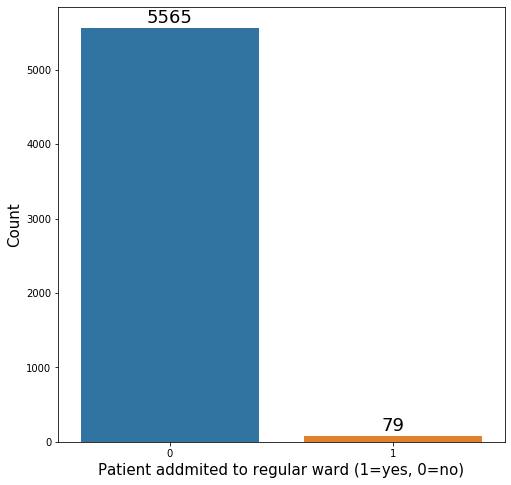

In [228]:
# Countplot of Patient addmited to regular ward (1=yes, 0=no)
plt.figure(figsize=(8,8))
pd =sns.countplot(x = 'Patient addmited to regular ward (1=yes, 0=no)' ,  data=df )
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.xlabel("Patient admited to regular ward (1=yes, 0=no)", size=15)
plt.ylabel("Count" ,size=15)
plt.show()


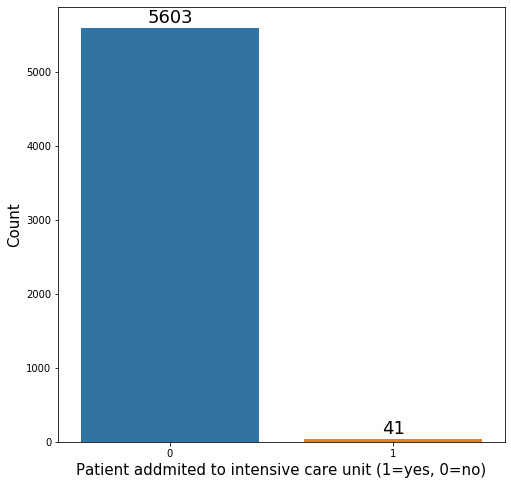

In [230]:
# Patient admited to intensive care unit (1=yes, 0=no)
plt.figure(figsize=(8,8))
pd =sns.countplot(x = 'Patient addmited to intensive care unit (1=yes, 0=no)' ,  data=df )
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.xlabel("Patient addmited to intensive care unit (1=yes, 0=no)", size=15)
plt.ylabel("Count" ,size=15)
plt.show()

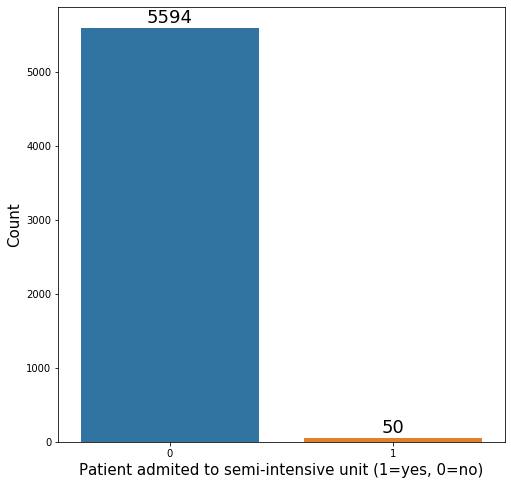

In [231]:
# Countplot of Patient addmited to semi-intensive unit (1=yes, 0=no)
plt.figure(figsize=(8,8))
pd =sns.countplot(x = 'Patient addmited to semi-intensive unit (1=yes, 0=no)' ,  data=df )
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.xlabel("Patient admited to semi-intensive unit (1=yes, 0=no)", size=15)
plt.ylabel("Count" ,size=15)
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f39d0ed848>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f39d0c1308>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f39d0ed9c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f39d0eda48>}

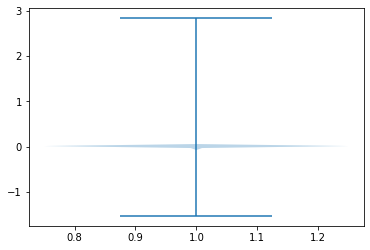

In [39]:
#Making voilinplot of Arteiral Fio2.
plt.violinplot(df['Arteiral Fio2'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f39cea7148>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f39f48bbc8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f39cea7788>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f39cea7a88>}

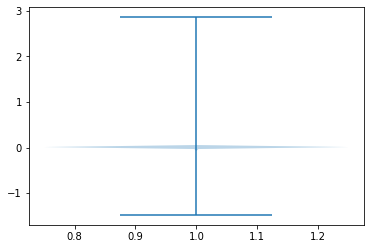

In [38]:
#Making voilinplot of Phosphor.
plt.violinplot(df['Phosphor'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f39cea9108>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f3a49c5fc8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f39cea9648>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f39cea9288>}

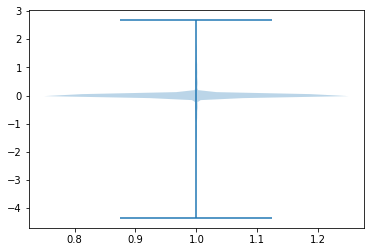

In [37]:
#Making voilinplot of Hemoglobin.
plt.violinplot(df["Hemoglobin"])

In [16]:
# droping Patient ID column from  dataset
df= df.drop("Patient ID",axis = 1)

In [17]:
#Using Label Encoder 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['SARS-Cov-2 exam result','Respiratory Syncytial Virus','Influenza A' ,'Influenza B',
       'Parainfluenza 1' ,'CoronavirusNL63' ,'Rhinovirus/Enterovirus', 'Mycoplasma pneumoniae',
        'Coronavirus HKU1', 'Parainfluenza 3' , 'Chlamydophila pneumoniae' ,'Adenovirus',
          'Parainfluenza 4' ,'Coronavirus229E' ,'CoronavirusOC43' ,'Inf A H1N1 2009' , 'Bordetella pertussis',
           'Metapneumovirus', 'Parainfluenza 2','Influenza B, rapid test' ,'Influenza A, rapid test',
'Strepto A' ,'Urine - Esterase','Urine - Aspect',
'Urine - pH','Urine - Hemoglobin','Urine - Bile pigments' ,'Urine - Ketone Bodies',
'Urine - Nitrite','Urine - Urobilinogen', 'Urine - Protein' , 'Urine - Crystals',
'Urine - Hyaline cylinders', 'Urine - Granular cylinders' ,'Urine - Yeasts',
'Urine - Color'

]
for val in list1:
     df[val]=le.fit_transform(df[val].astype(str))

In [18]:
df

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5640,17,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5641,4,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5642,10,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting Data into target and Input

In [20]:
x=df.drop(['SARS-Cov-2 exam result'],axis=1)
x

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5640,17,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5641,4,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5642,10,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
y=df["SARS-Cov-2 exam result"]
y

0       0
1       0
2       0
3       0
4       0
       ..
5639    1
5640    0
5641    0
5642    0
5643    1
Name: SARS-Cov-2 exam result, Length: 5644, dtype: int32

In [22]:
# standard scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler(copy=True, with_mean=True, with_std=True)


# Importing Necessary libraries

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV

# Finding Best random state of different algorithim

In [200]:
max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    dtc=DecisionTreeClassifier()
    dtc.fit(train_x,train_y)
    pred=dtc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for DecisionTreeClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for LogisticRegression  ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")



max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    sv=SVC()
    sv.fit(train_x,train_y)
    pred=sv.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for SVC ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    rfc=RandomForestClassifier()
    rfc.fit(train_x,train_y)
    pred=rfc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for RandomForestClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    ada=AdaBoostClassifier()
    ada.fit(train_x,train_y)
    pred=ada.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for AdaBoostClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    gnb=GaussianNB()
    gnb.fit(train_x,train_y)
    pred=gnb.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for GaussianNB", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    knn=KNeighborsClassifier()
    knn.fit(train_x,train_y)
    pred=knn.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for KNeighborsClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    gbr=GradientBoostingClassifier()
    gbr.fit(train_x,train_y)
    pred=gbr.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for GradientBoostingClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

The max accuracy score  for DecisionTreeClassifier  0.9185119574844995 is achieved at 70


The max accuracy score  for LogisticRegression   0.9264836138175376 is achieved at 91


The max accuracy score  for SVC  0.9247121346324181 is achieved at 70


The max accuracy score  for RandomForestClassifier  0.9273693534100974 is achieved at 70


The max accuracy score  for AdaBoostClassifier 0.9264836138175376 is achieved at 70


The max accuracy score  for GaussianNB 0.8963684676705048 is achieved at 84


The max accuracy score  for KNeighborsClassifier 0.9247121346324181 is achieved at 70


The max accuracy score  for GradientBoostingClassifier 0.929140832595217 is achieved at 70




# Using GridSearchCV to select best parameters

In [201]:
#Best parameters for Logistic Regression

print("LogisticRegression")
print("******************" )
print(" ")
lg=LogisticRegression()
parameters={"penalty":['l1' ,'l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for SVC
print("SVC")
print("****************** " )
print(" ")
sv=SVC()
parameters={"kernel" : ( "Linear" ,"rbf" ) ,"C": [1,10]}
gd=GridSearchCV(sv,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for KNeighborsClassifier

print("KNeighborsClassifier" )
print("*********************" )
print(" ")
knn=KNeighborsClassifier()
parameters={"n_neighbors" :( 5,20), 'algorithm' :('auto', 'ball_tree', 'kd_tree', 'brute')}
gd=GridSearchCV(knn,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for DecisionTreeClassifier
print("DecisionTreeClassifier" )
print("********************* ")
print(" ")
dtc=DecisionTreeClassifier()
parameters={"criterion" :("gini" ,"entropy"),'max_features':('auto', 'sqrt', 'log2')}
gd=GridSearchCV(dtc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for  RandomForestClassifier
print("RandomForestClassifier" )
print("*********************  ")
print(" ")
rfc=RandomForestClassifier()
parameters={"criterion" :("gini" ,"entropy"), 'max_features':('auto', 'sqrt', 'log2')}
gd=GridSearchCV(rfc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for  AdaboostClassifier 
print("AdaBoostClassifier" )
print("*********************   ")
print(" ")
ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


LogisticRegression
******************
 
{'penalty': 'l2'}


SVC
****************** 
 
{'C': 1, 'kernel': 'rbf'}


KNeighborsClassifier
*********************
 
{'algorithm': 'auto', 'n_neighbors': 20}


DecisionTreeClassifier
********************* 
 
{'criterion': 'entropy', 'max_features': 'sqrt'}


RandomForestClassifier
*********************  
 
{'criterion': 'entropy', 'max_features': 'auto'}


AdaBoostClassifier
*********************   
 
{'learning_rate': 0.1, 'n_estimators': 100}






The model calculation for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=91, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) are:
[0 0 0 ... 0 0 0]
Accuracy Score=  0.8945969884853853
The CV Score is 0.9016654731168611

[[1008  116]
 [   3    2]]

              precision    recall  f1-score   support

           0       1.00      0.90      0.94      1124
           1       0.02      0.40      0.03         5

    accuracy                           0.89      1129
   macro avg       0.51      0.65      0.49      1129
weighted avg       0.99      0.89      0.94      1129



roc_auc_score 0.5069908967459639


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model calculation for SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_func

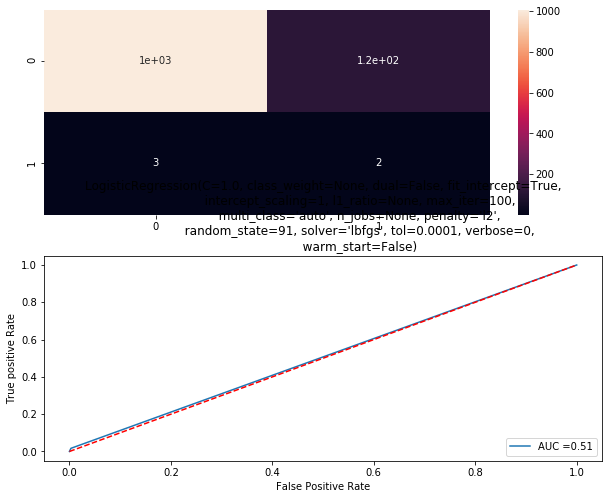

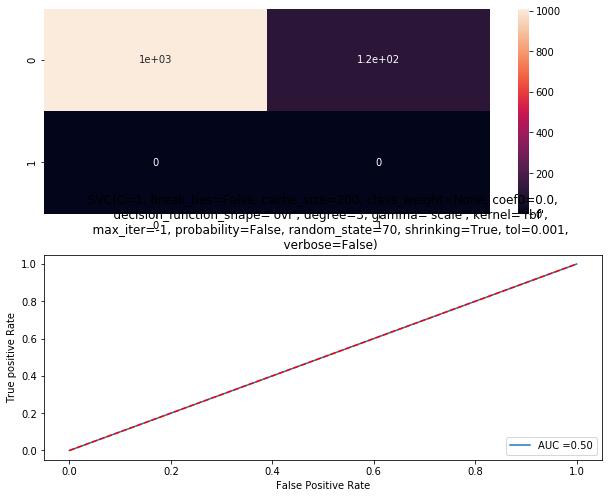

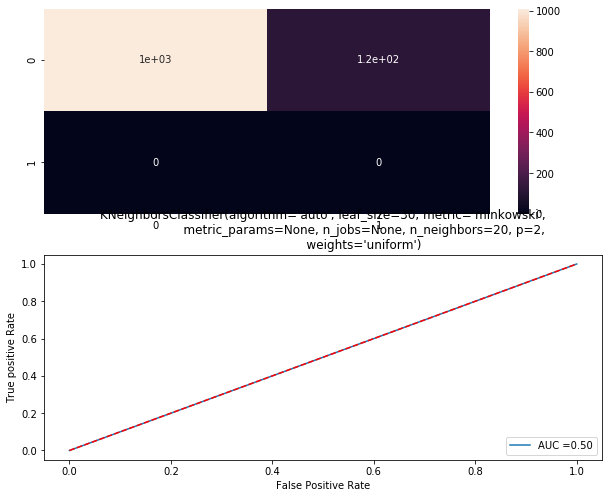

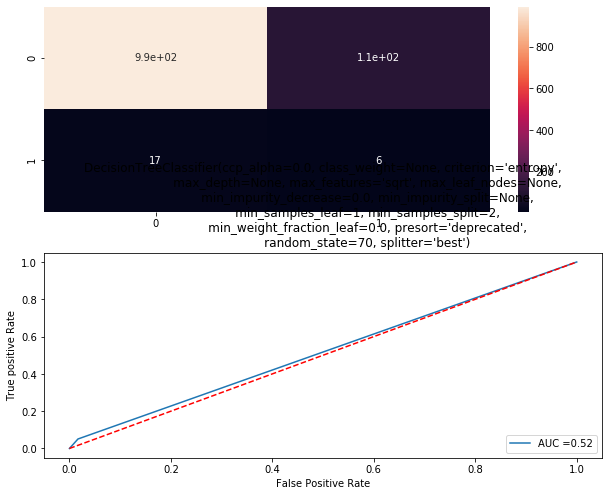

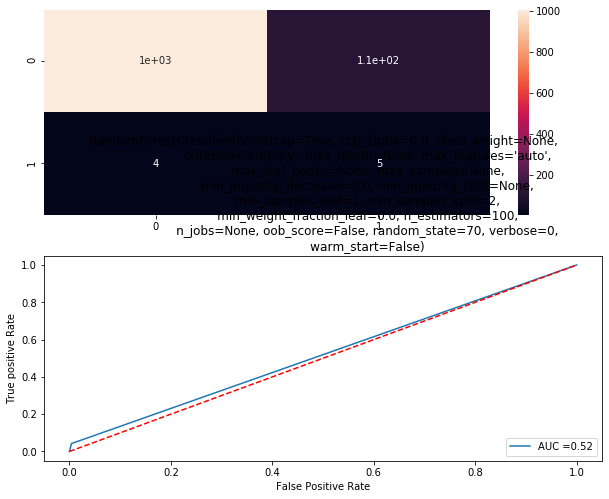

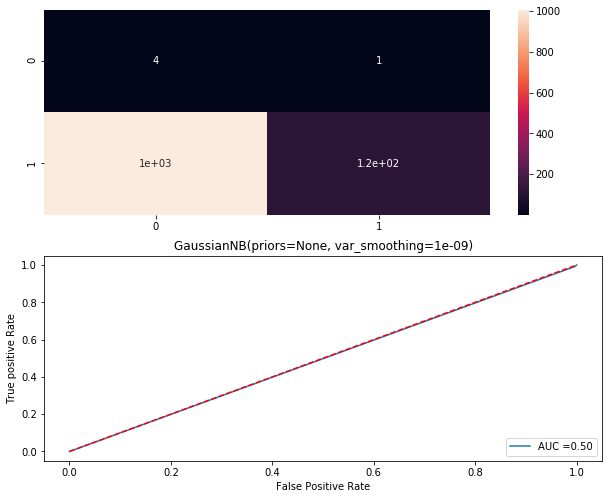

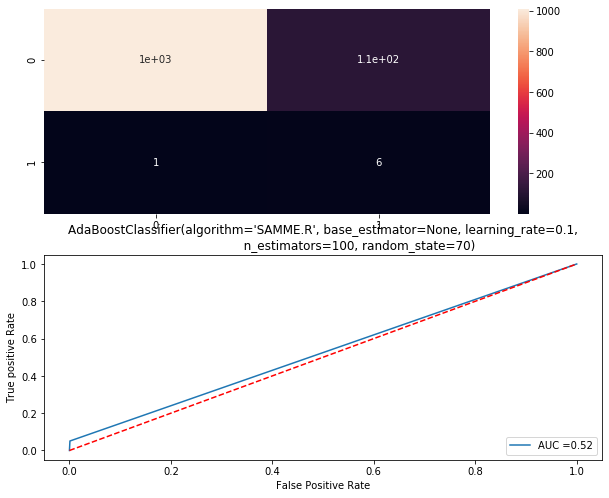

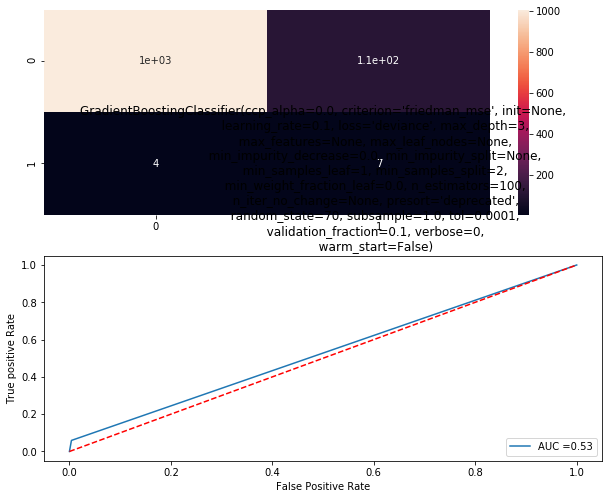

In [202]:
model=[]
score=[]
cvs=[]
rocscore=[]


for i in [LogisticRegression(penalty="l2" ,random_state= 91 ),SVC(C=1 ,kernel ="rbf" ,random_state= 70 ),
          KNeighborsClassifier(n_neighbors= 20 ,algorithm = 'auto' ) ,
          DecisionTreeClassifier(criterion ="entropy" , random_state= 70  , max_features = 'sqrt'),
          RandomForestClassifier(criterion ="entropy"  ,random_state= 70 ,max_features = 'auto' ),
          GaussianNB( ),AdaBoostClassifier( learning_rate = 0.1, n_estimators = 100 ,random_state= 70) ,
          GradientBoostingClassifier (random_state= 70)]:  
          
          
        k=i
        model.append(i)
        print("\n")
        print("The model calculation for" ,i,"are:" )
        k.fit(train_x,train_y)
        k.score(train_x,train_y)
        predict =k.predict(test_x)
        print(predict)
        AS=accuracy_score(predict,test_y)
        print("Accuracy Score= " ,AS)
        score.append(AS)
        cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
        print("The CV Score is"  ,cv_score)
        cvs.append(cv_score)
        print("")
        cm=confusion_matrix(predict,test_y)
        print(cm)
        print("")
        print(classification_report(predict,test_y))
        print("\n")
        false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,predict)
        roc_auc=auc(false_positive_rate,true_positive_rate)
        print("roc_auc_score" ,roc_auc)
        rocscore.append(roc_auc)
        print("\n")
        plt.figure(figsize=(10,40))
        plt.subplot(911)
        print(sns.heatmap(cm,annot=True))
        plt.subplot(912)
        plt.title(i)
        plt.plot(false_positive_rate,true_positive_rate,label="AUC =%0.2f" %roc_auc)
        plt.plot([0,1] ,[0,1] ,'r--')
        plt.legend(loc="lower right")
        plt.ylabel('True positive Rate')
        plt.xlabel("False Positive Rate")

# Since AdaBoostClassifier is giving better result so we choose it as final model

In [203]:
ada= AdaBoostClassifier( learning_rate = 0.1, n_estimators = 100 ,random_state= 70)
ada.fit(train_x,train_y)
predict=ada.predict(test_x)
AS=accuracy_score(predict,test_y)
print("Accuracy Score=" ,AS)
cv_score=cross_val_score(ada,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score is", cv_score)

Accuracy Score= 0.899911426040744
The CV Score is 0.9030826564649568


# Saving the model

In [204]:
from  sklearn.externals import joblib
joblib.dump(ada,"covid56.pkl")

['covid56.pkl']

# Saving Prediction in csv file

In [205]:
dft=pd.DataFrame(predict)
dft.to_csv("covid57.csv")

In [275]:
print("###################################################################")
print("##################################################################")

###################################################################
##################################################################


# Now Predicting admission to general ward

In [263]:
x=df.drop(['Patient addmited to regular ward (1=yes, 0=no)'],axis=1)
x

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5640,17,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5641,4,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5642,10,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [265]:
# standard scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [266]:
y=df["Patient addmited to regular ward (1=yes, 0=no)"]
y

0       0
1       0
2       0
3       0
4       0
       ..
5639    0
5640    0
5641    0
5642    0
5643    0
Name: Patient addmited to regular ward (1=yes, 0=no), Length: 5644, dtype: int64

# Importing Necessary libraries

In [267]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV

# Finding Best random state of different algorithim

In [268]:
max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    dtc=DecisionTreeClassifier()
    dtc.fit(train_x,train_y)
    pred=dtc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for DecisionTreeClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for LogisticRegression  ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")



max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    sv=SVC()
    sv.fit(train_x,train_y)
    pred=sv.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for SVC ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    rfc=RandomForestClassifier()
    rfc.fit(train_x,train_y)
    pred=rfc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for RandomForestClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    ada=AdaBoostClassifier()
    ada.fit(train_x,train_y)
    pred=ada.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for AdaBoostClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    gnb=GaussianNB()
    gnb.fit(train_x,train_y)
    pred=gnb.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for GaussianNB", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    knn=KNeighborsClassifier()
    knn.fit(train_x,train_y)
    pred=knn.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for KNeighborsClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    gbr=GradientBoostingClassifier()
    gbr.fit(train_x,train_y)
    pred=gbr.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for GradientBoostingClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

The max accuracy score  for DecisionTreeClassifier  0.9858281665190434 is achieved at 45


The max accuracy score  for LogisticRegression   0.9920283436669619 is achieved at 71


The max accuracy score  for SVC  0.9929140832595217 is achieved at 59


The max accuracy score  for RandomForestClassifier  0.9929140832595217 is achieved at 59


The max accuracy score  for AdaBoostClassifier 0.9946855624446412 is achieved at 82


The max accuracy score  for GaussianNB 0.9929140832595217 is achieved at 59


The max accuracy score  for KNeighborsClassifier 0.9920283436669619 is achieved at 59


The max accuracy score  for GradientBoostingClassifier 0.9911426040744021 is achieved at 71




# Using GridSearchCV to select best parameters

In [269]:
#Best parameters for Logistic Regression

print("LogisticRegression")
print("******************" )
print(" ")
lg=LogisticRegression()
parameters={"penalty":['l1' ,'l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for SVC
print("SVC")
print("****************** " )
print(" ")
sv=SVC()
parameters={"kernel" : ( "Linear" ,"rbf" ) ,"C": [1,10]}
gd=GridSearchCV(sv,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for KNeighborsClassifier

print("KNeighborsClassifier" )
print("*********************" )
print(" ")
knn=KNeighborsClassifier()
parameters={"n_neighbors" :( 5,20), 'algorithm' :('auto', 'ball_tree', 'kd_tree', 'brute')}
gd=GridSearchCV(knn,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for DecisionTreeClassifier
print("DecisionTreeClassifier" )
print("********************* ")
print(" ")
dtc=DecisionTreeClassifier()
parameters={"criterion" :("gini" ,"entropy"),'max_features':('auto', 'sqrt', 'log2')}
gd=GridSearchCV(dtc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for  RandomForestClassifier
print("RandomForestClassifier" )
print("*********************  ")
print(" ")
rfc=RandomForestClassifier()
parameters={"criterion" :("gini" ,"entropy"), 'max_features':('auto', 'sqrt', 'log2')}
gd=GridSearchCV(rfc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for  AdaboostClassifier 
print("AdaBoostClassifier" )
print("*********************   ")
print(" ")
ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


LogisticRegression
******************
 
{'penalty': 'l2'}


SVC
****************** 
 
{'C': 1, 'kernel': 'rbf'}


KNeighborsClassifier
*********************
 
{'algorithm': 'auto', 'n_neighbors': 20}


DecisionTreeClassifier
********************* 
 
{'criterion': 'entropy', 'max_features': 'auto'}


RandomForestClassifier
*********************  
 
{'criterion': 'gini', 'max_features': 'log2'}


AdaBoostClassifier
*********************   
 
{'learning_rate': 0.1, 'n_estimators': 100}






The model calculation for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=71, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) are:
[0 0 0 ... 0 0 0]
Accuracy Score=  0.9867139061116031
The CV Score is 0.9867115504211974

[[1114   15]
 [   0    0]]

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1129
           1       0.00      0.00      0.00         0

    accuracy                           0.99      1129
   macro avg       0.50      0.49      0.50      1129
weighted avg       1.00      0.99      0.99      1129



roc_auc_score 0.5


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model calculation for SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr

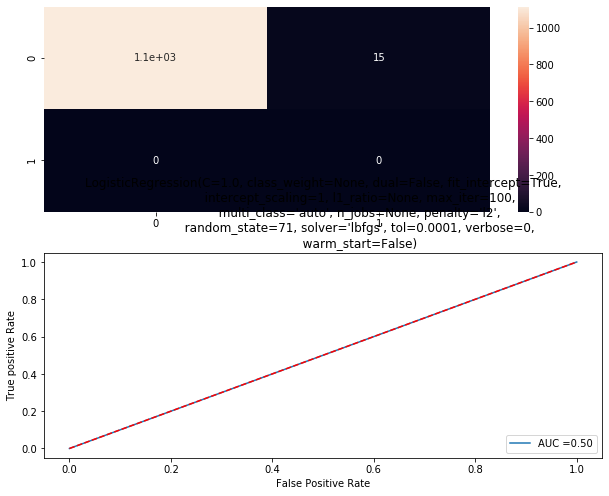

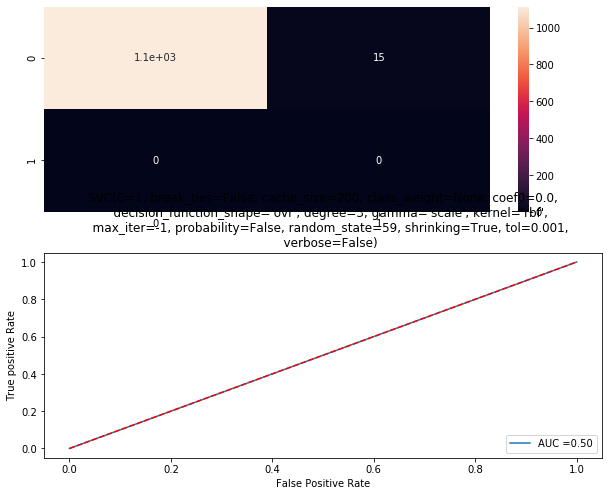

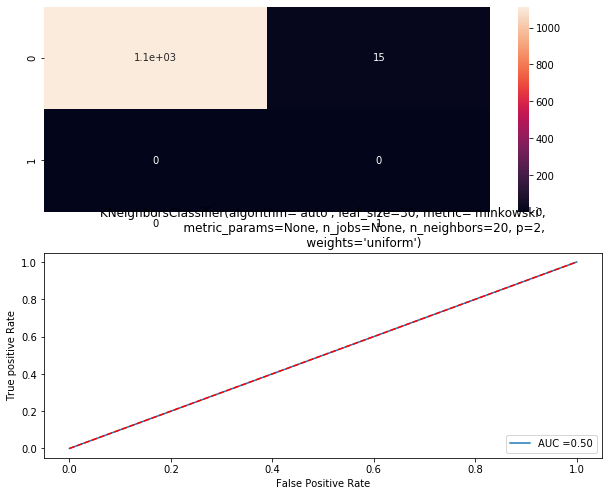

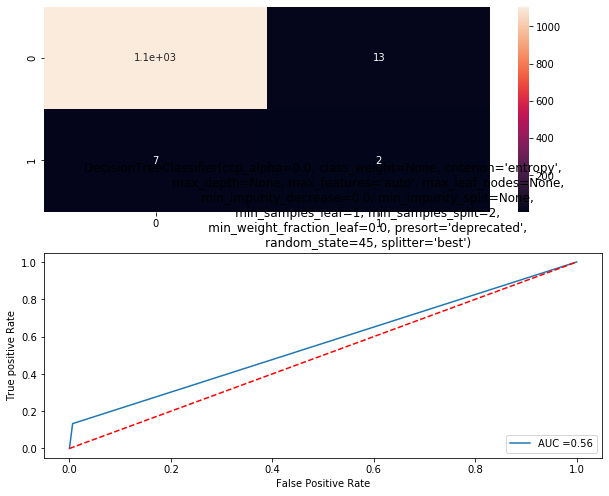

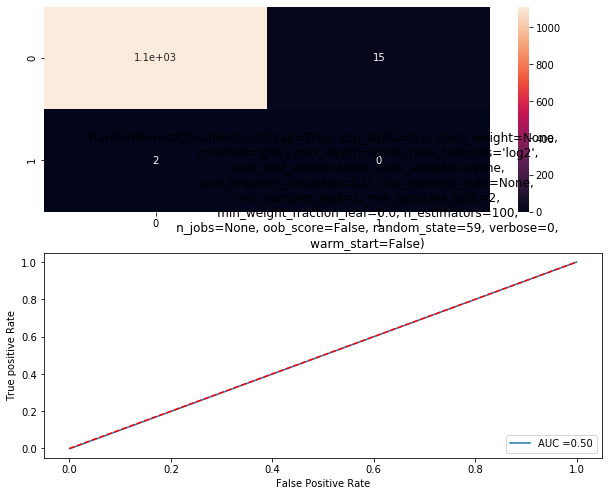

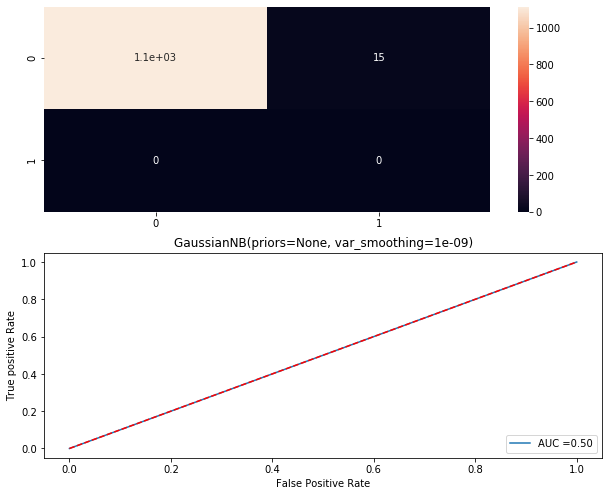

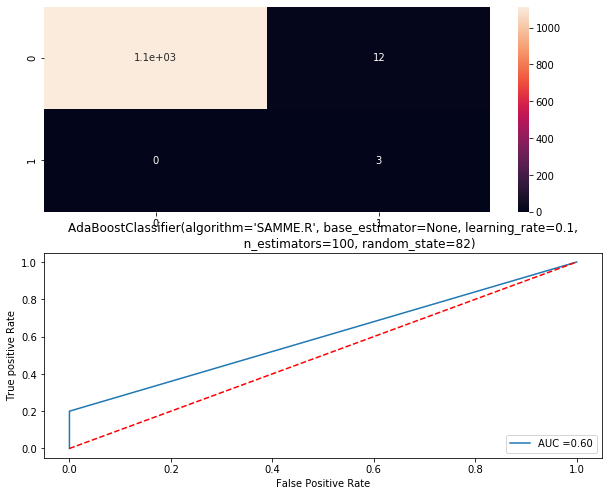

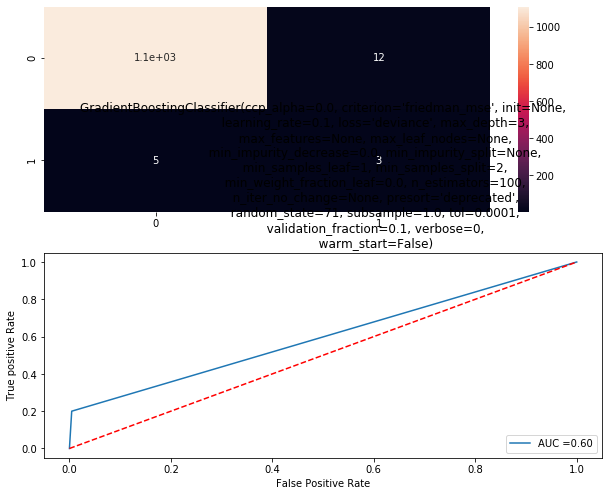

In [271]:
model=[]
score=[]
cvs=[]
rocscore=[]


for i in [LogisticRegression(penalty="l2" ,random_state= 71 ),SVC(C=1 ,kernel ="rbf" ,random_state= 59 ),
          KNeighborsClassifier(n_neighbors= 20 ,algorithm = 'auto' ) ,
          DecisionTreeClassifier(criterion ="entropy" , random_state= 45  , max_features = 'auto'),
          RandomForestClassifier(criterion ='gini'  ,random_state= 59 ,max_features = 'log2' ),
          GaussianNB( ),AdaBoostClassifier( learning_rate = 0.1, n_estimators = 100 ,random_state= 82) ,
          GradientBoostingClassifier (random_state= 71)]:  
          
          
        k=i
        model.append(i)
        print("\n")
        print("The model calculation for" ,i,"are:" )
        k.fit(train_x,train_y)
        k.score(train_x,train_y)
        predict =k.predict(test_x)
        print(predict)
        AS=accuracy_score(predict,test_y)
        print("Accuracy Score= " ,AS)
        score.append(AS)
        cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
        print("The CV Score is"  ,cv_score)
        cvs.append(cv_score)
        print("")
        cm=confusion_matrix(predict,test_y)
        print(cm)
        print("")
        print(classification_report(predict,test_y))
        print("\n")
        false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,predict)
        roc_auc=auc(false_positive_rate,true_positive_rate)
        print("roc_auc_score" ,roc_auc)
        rocscore.append(roc_auc)
        print("\n")
        plt.figure(figsize=(10,40))
        plt.subplot(911)
        print(sns.heatmap(cm,annot=True))
        plt.subplot(912)
        plt.title(i)
        plt.plot(false_positive_rate,true_positive_rate,label="AUC =%0.2f" %roc_auc)
        plt.plot([0,1] ,[0,1] ,'r--')
        plt.legend(loc="lower right")
        plt.ylabel('True positive Rate')
        plt.xlabel("False Positive Rate")

# Since AdaBoostClassifier is giving better result so we choose it as final model

In [285]:
ada= AdaBoostClassifier( learning_rate = 0.1, n_estimators = 100 ,random_state= 82)
ada.fit(train_x,train_y)
predict=ada.predict(test_x)
AS=accuracy_score(predict,test_y)
print("Accuracy Score=" ,AS)
cv_score=cross_val_score(ada,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score is", cv_score)

Accuracy Score= 0.9902568644818424
The CV Score is 0.9881268492169685


# Saving the model

In [286]:
from  sklearn.externals import joblib
joblib.dump(ada,"covid48.pkl")

['covid48.pkl']

# __________________________________________________#

In [276]:
print("##################################################################")

##################################################################


# Now Predicting admission to  semi-intensive unit

In [277]:
x=df.drop(['Patient addmited to semi-intensive unit (1=yes, 0=no)'],axis=1)
x

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5640,17,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5641,4,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5642,10,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [278]:
# standard scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [279]:
y=df["Patient addmited to semi-intensive unit (1=yes, 0=no)"]
y

0       0
1       0
2       0
3       0
4       0
       ..
5639    0
5640    0
5641    0
5642    0
5643    0
Name: Patient addmited to semi-intensive unit (1=yes, 0=no), Length: 5644, dtype: int64

# Importing Necessary libraries

In [280]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV

# Finding Best random state of different algorithim

In [281]:
max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    dtc=DecisionTreeClassifier()
    dtc.fit(train_x,train_y)
    pred=dtc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for DecisionTreeClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for LogisticRegression  ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")



max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    sv=SVC()
    sv.fit(train_x,train_y)
    pred=sv.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for SVC ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    rfc=RandomForestClassifier()
    rfc.fit(train_x,train_y)
    pred=rfc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for RandomForestClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    ada=AdaBoostClassifier()
    ada.fit(train_x,train_y)
    pred=ada.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for AdaBoostClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    gnb=GaussianNB()
    gnb.fit(train_x,train_y)
    pred=gnb.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for GaussianNB", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    knn=KNeighborsClassifier()
    knn.fit(train_x,train_y)
    pred=knn.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for KNeighborsClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    gbr=GradientBoostingClassifier()
    gbr.fit(train_x,train_y)
    pred=gbr.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for GradientBoostingClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

The max accuracy score  for DecisionTreeClassifier  0.9937998228520815 is achieved at 54


The max accuracy score  for LogisticRegression   0.9964570416297609 is achieved at 54


The max accuracy score  for SVC  0.9973427812223207 is achieved at 54


The max accuracy score  for RandomForestClassifier  0.995571302037201 is achieved at 67


The max accuracy score  for AdaBoostClassifier 0.9973427812223207 is achieved at 67


The max accuracy score  for GaussianNB 0.9973427812223207 is achieved at 54


The max accuracy score  for KNeighborsClassifier 0.9964570416297609 is achieved at 79


The max accuracy score  for GradientBoostingClassifier 0.9946855624446412 is achieved at 67




# Using GridSearchCV to select best parameters

In [282]:
#Best parameters for Logistic Regression

print("LogisticRegression")
print("******************" )
print(" ")
lg=LogisticRegression()
parameters={"penalty":['l1' ,'l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for SVC
print("SVC")
print("****************** " )
print(" ")
sv=SVC()
parameters={"kernel" : ( "Linear" ,"rbf" ) ,"C": [1,10]}
gd=GridSearchCV(sv,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for KNeighborsClassifier

print("KNeighborsClassifier" )
print("*********************" )
print(" ")
knn=KNeighborsClassifier()
parameters={"n_neighbors" :( 5,20), 'algorithm' :('auto', 'ball_tree', 'kd_tree', 'brute')}
gd=GridSearchCV(knn,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for DecisionTreeClassifier
print("DecisionTreeClassifier" )
print("********************* ")
print(" ")
dtc=DecisionTreeClassifier()
parameters={"criterion" :("gini" ,"entropy"),'max_features':('auto', 'sqrt', 'log2')}
gd=GridSearchCV(dtc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for  RandomForestClassifier
print("RandomForestClassifier" )
print("*********************  ")
print(" ")
rfc=RandomForestClassifier()
parameters={"criterion" :("gini" ,"entropy"), 'max_features':('auto', 'sqrt', 'log2')}
gd=GridSearchCV(rfc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for  AdaboostClassifier 
print("AdaBoostClassifier" )
print("*********************   ")
print(" ")
ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


LogisticRegression
******************
 
{'penalty': 'l2'}


SVC
****************** 
 
{'C': 1, 'kernel': 'rbf'}


KNeighborsClassifier
*********************
 
{'algorithm': 'auto', 'n_neighbors': 5}


DecisionTreeClassifier
********************* 
 
{'criterion': 'entropy', 'max_features': 'sqrt'}


RandomForestClassifier
*********************  
 
{'criterion': 'gini', 'max_features': 'log2'}


AdaBoostClassifier
*********************   
 
{'learning_rate': 0.001, 'n_estimators': 150}






The model calculation for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=54, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) are:
[0 0 0 ... 0 0 0]
Accuracy Score=  0.9884853852967228
The CV Score is 0.9863536425255515

[[1116   12]
 [   1    0]]

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1128
           1       0.00      0.00      0.00         1

    accuracy                           0.99      1129
   macro avg       0.50      0.49      0.50      1129
weighted avg       1.00      0.99      0.99      1129



roc_auc_score 0.4995523724261415


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model calculation for SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_func

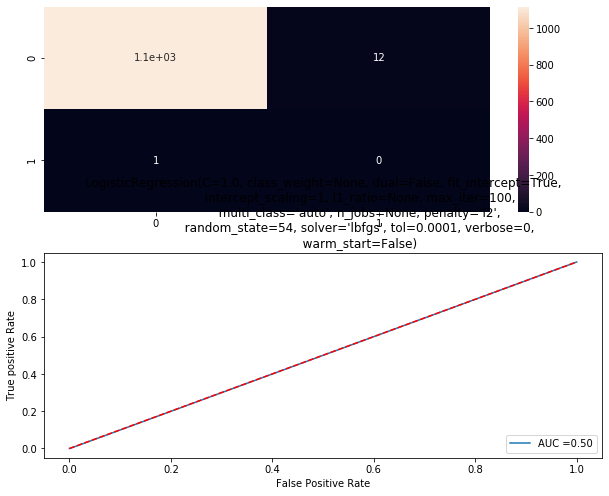

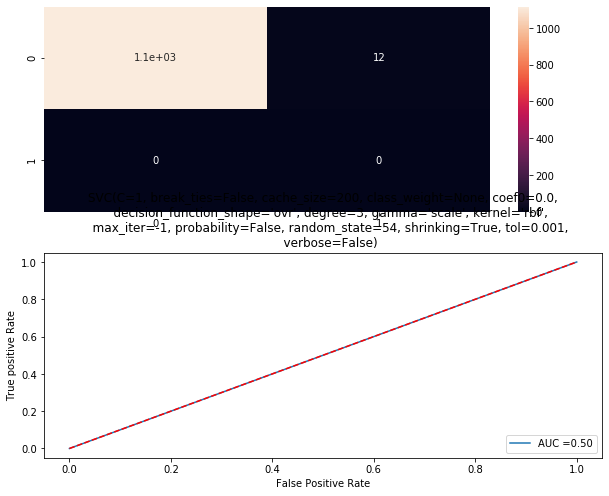

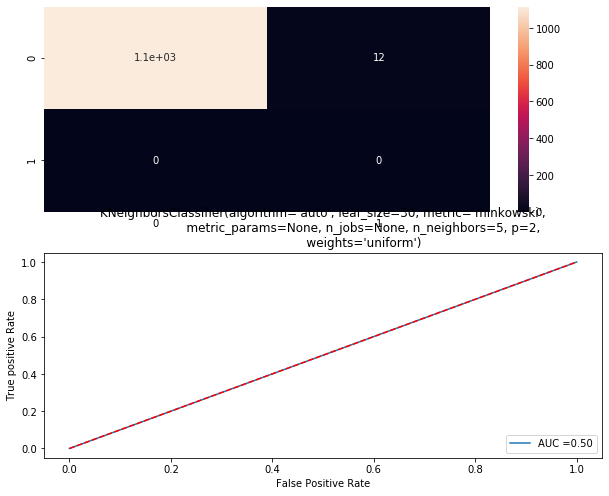

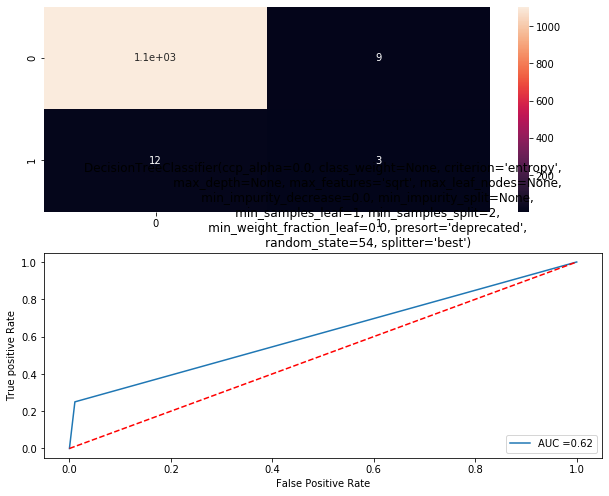

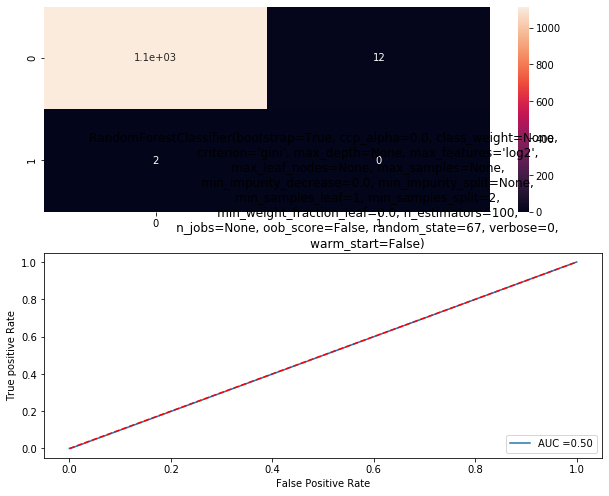

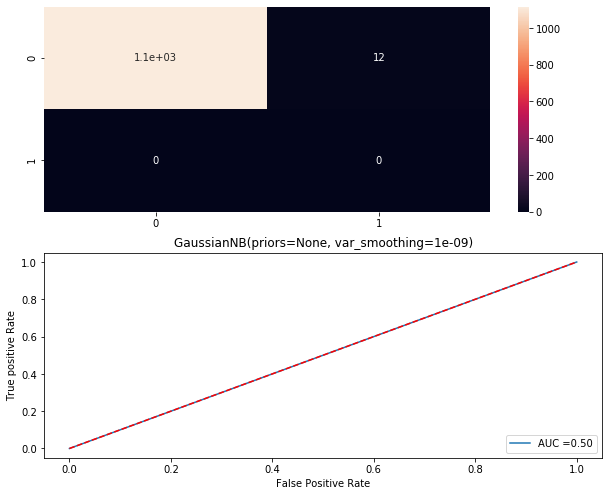

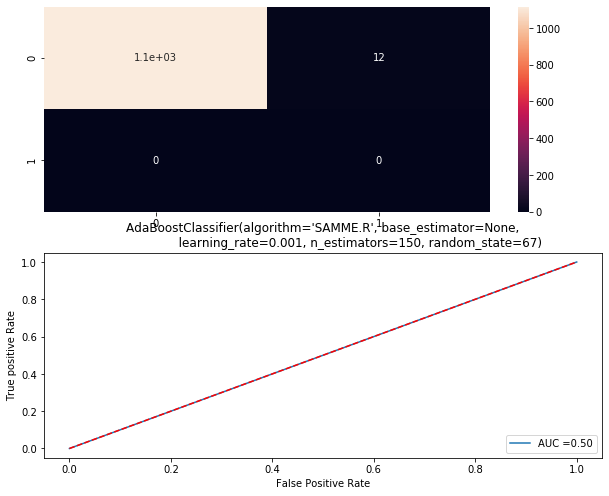

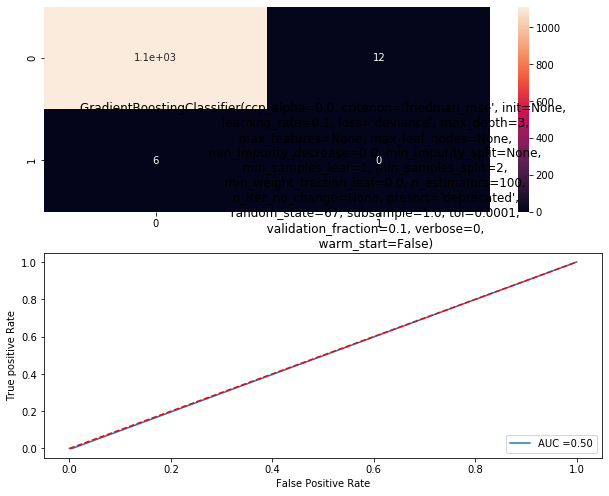

In [283]:
model=[]
score=[]
cvs=[]
rocscore=[]


for i in [LogisticRegression(penalty="l2" ,random_state= 54 ),SVC(C=1 ,kernel ="rbf" ,random_state= 54 ),
          KNeighborsClassifier(n_neighbors= 5 ,algorithm = 'auto' ) ,
          DecisionTreeClassifier(criterion ="entropy" , random_state= 54  , max_features = 'sqrt'),
          RandomForestClassifier(criterion ='gini'  ,random_state= 67 ,max_features = 'log2' ),
          GaussianNB( ),AdaBoostClassifier( learning_rate = 0.001, n_estimators = 150 ,random_state= 67) ,
          GradientBoostingClassifier (random_state= 67)]:  
          
          
        k=i
        model.append(i)
        print("\n")
        print("The model calculation for" ,i,"are:" )
        k.fit(train_x,train_y)
        k.score(train_x,train_y)
        predict =k.predict(test_x)
        print(predict)
        AS=accuracy_score(predict,test_y)
        print("Accuracy Score= " ,AS)
        score.append(AS)
        cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
        print("The CV Score is"  ,cv_score)
        cvs.append(cv_score)
        print("")
        cm=confusion_matrix(predict,test_y)
        print(cm)
        print("")
        print(classification_report(predict,test_y))
        print("\n")
        false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,predict)
        roc_auc=auc(false_positive_rate,true_positive_rate)
        print("roc_auc_score" ,roc_auc)
        rocscore.append(roc_auc)
        print("\n")
        plt.figure(figsize=(10,40))
        plt.subplot(911)
        print(sns.heatmap(cm,annot=True))
        plt.subplot(912)
        plt.title(i)
        plt.plot(false_positive_rate,true_positive_rate,label="AUC =%0.2f" %roc_auc)
        plt.plot([0,1] ,[0,1] ,'r--')
        plt.legend(loc="lower right")
        plt.ylabel('True positive Rate')
        plt.xlabel("False Positive Rate")

# Since AdaBoostClassifier is giving better result so we choose it as final model

In [284]:
ada= AdaBoostClassifier( learning_rate = 0.001, n_estimators = 150 ,random_state= 67)
ada.fit(train_x,train_y)
predict=ada.predict(test_x)
AS=accuracy_score(predict,test_y)
print("Accuracy Score=" ,AS)
cv_score=cross_val_score(ada,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score is", cv_score)

Accuracy Score= 0.9893711248892826
The CV Score is 0.9909637286495926


# Saving the model

In [ ]:
from  sklearn.externals import joblib
joblib.dump(ada,"covid50.pkl")

In [1]:
print("*********************************************************************************************************")

*********************************************************************************************************


# Now Predicting admission to intensive care unit 

In [21]:
x=df.drop(['Patient addmited to intensive care unit (1=yes, 0=no)'],axis=1)
x

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5640,17,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5641,4,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5642,10,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
y=df["Patient addmited to intensive care unit (1=yes, 0=no)"]
y

0       0
1       0
2       0
3       0
4       0
       ..
5639    0
5640    0
5641    0
5642    0
5643    0
Name: Patient addmited to intensive care unit (1=yes, 0=no), Length: 5644, dtype: int64

# Importing Necessary libraries

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV

In [24]:
# standard scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler(copy=True, with_mean=True, with_std=True)


# Finding Best random state of different algorithim¶

In [25]:
max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    dtc=DecisionTreeClassifier()
    dtc.fit(train_x,train_y)
    pred=dtc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for DecisionTreeClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for LogisticRegression  ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")



max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    sv=SVC()
    sv.fit(train_x,train_y)
    pred=sv.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for SVC ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    rfc=RandomForestClassifier()
    rfc.fit(train_x,train_y)
    pred=rfc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for RandomForestClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    ada=AdaBoostClassifier()
    ada.fit(train_x,train_y)
    pred=ada.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for AdaBoostClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    gnb=GaussianNB()
    gnb.fit(train_x,train_y)
    pred=gnb.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for GaussianNB", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    knn=KNeighborsClassifier()
    knn.fit(train_x,train_y)
    pred=knn.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for KNeighborsClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    gbr=GradientBoostingClassifier()
    gbr.fit(train_x,train_y)
    pred=gbr.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for GradientBoostingClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

The max accuracy score  for DecisionTreeClassifier  0.9937998228520815 is achieved at 82


The max accuracy score  for LogisticRegression   0.9973427812223207 is achieved at 91


The max accuracy score  for SVC  0.9973427812223207 is achieved at 45


The max accuracy score  for RandomForestClassifier  0.995571302037201 is achieved at 45


The max accuracy score  for AdaBoostClassifier 0.9982285208148804 is achieved at 45


The max accuracy score  for GaussianNB 0.9973427812223207 is achieved at 45


The max accuracy score  for KNeighborsClassifier 0.9973427812223207 is achieved at 45


The max accuracy score  for GradientBoostingClassifier 0.9964570416297609 is achieved at 45




# Using GridSearchCV to select best parameters

In [26]:
#Best parameters for Logistic Regression

print("LogisticRegression")
print("******************" )
print(" ")
lg=LogisticRegression()
parameters={"penalty":['l1' ,'l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for SVC
print("SVC")
print("****************** " )
print(" ")
sv=SVC()
parameters={"kernel" : ( "Linear" ,"rbf" ) ,"C": [1,10]}
gd=GridSearchCV(sv,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for KNeighborsClassifier

print("KNeighborsClassifier" )
print("*********************" )
print(" ")
knn=KNeighborsClassifier()
parameters={"n_neighbors" :( 5,20), 'algorithm' :('auto', 'ball_tree', 'kd_tree', 'brute')}
gd=GridSearchCV(knn,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for DecisionTreeClassifier
print("DecisionTreeClassifier" )
print("********************* ")
print(" ")
dtc=DecisionTreeClassifier()
parameters={"criterion" :("gini" ,"entropy"),'max_features':('auto', 'sqrt', 'log2')}
gd=GridSearchCV(dtc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for  RandomForestClassifier
print("RandomForestClassifier" )
print("*********************  ")
print(" ")
rfc=RandomForestClassifier()
parameters={"criterion" :("gini" ,"entropy"), 'max_features':('auto', 'sqrt', 'log2')}
gd=GridSearchCV(rfc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for  AdaboostClassifier 
print("AdaBoostClassifier" )
print("*********************   ")
print(" ")
ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


LogisticRegression
******************
 
{'penalty': 'l2'}


SVC
****************** 
 
{'C': 1, 'kernel': 'rbf'}


KNeighborsClassifier
*********************
 
{'algorithm': 'auto', 'n_neighbors': 5}


DecisionTreeClassifier
********************* 
 
{'criterion': 'entropy', 'max_features': 'auto'}


RandomForestClassifier
*********************  
 
{'criterion': 'gini', 'max_features': 'sqrt'}


AdaBoostClassifier
*********************   
 
{'learning_rate': 0.001, 'n_estimators': 150}






The model calculation for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=91, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) are:
[0 0 0 ... 0 0 0]
Accuracy Score=  0.9937998228520815
The CV Score is 0.9909629434194575

[[1121    5]
 [   2    1]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1126
           1       0.17      0.33      0.22         3

    accuracy                           0.99      1129
   macro avg       0.58      0.66      0.61      1129
weighted avg       1.00      0.99      0.99      1129



roc_auc_score 0.5824428613831998


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model calculation for SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_func

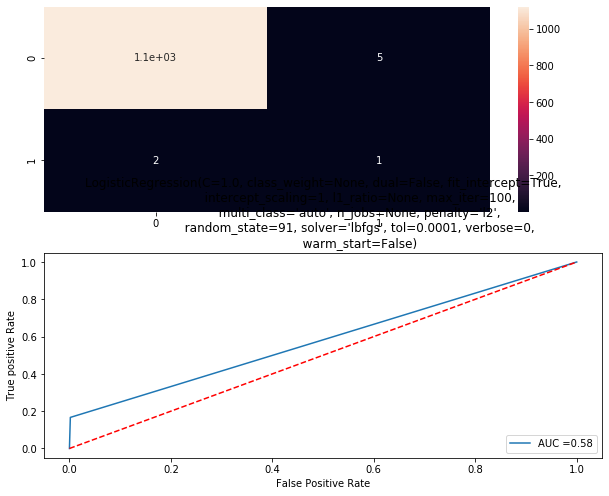

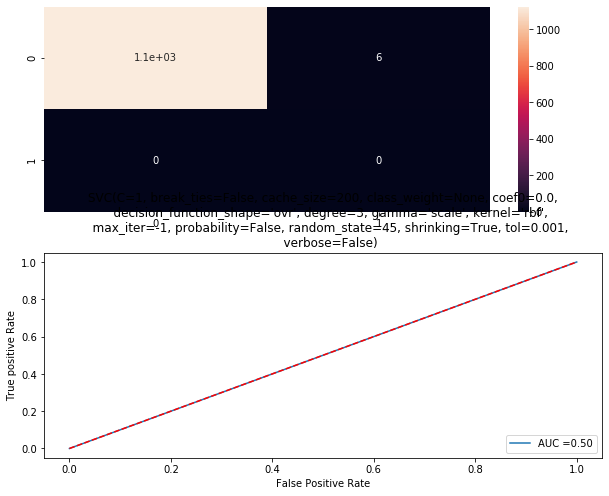

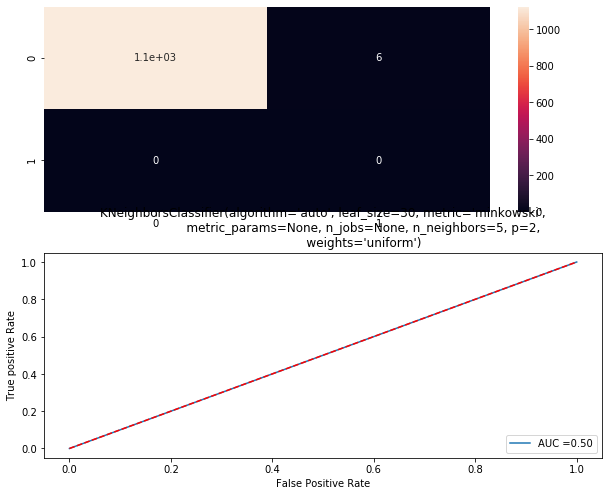

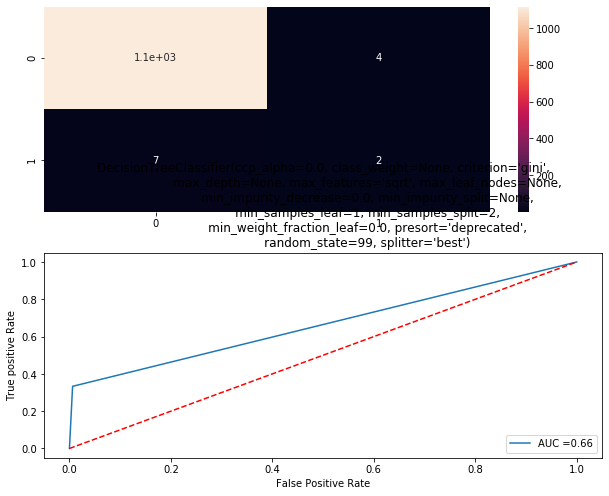

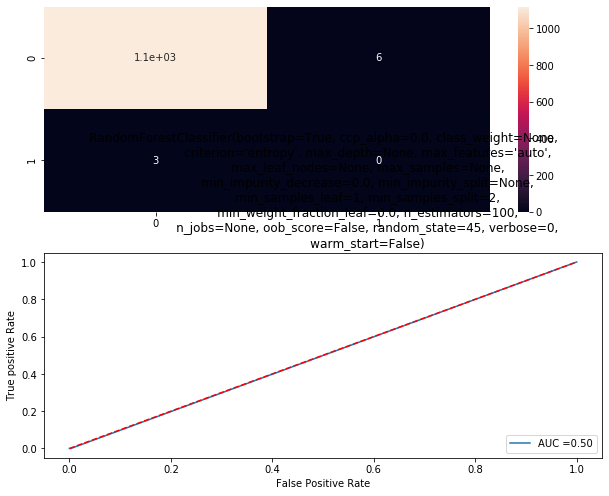

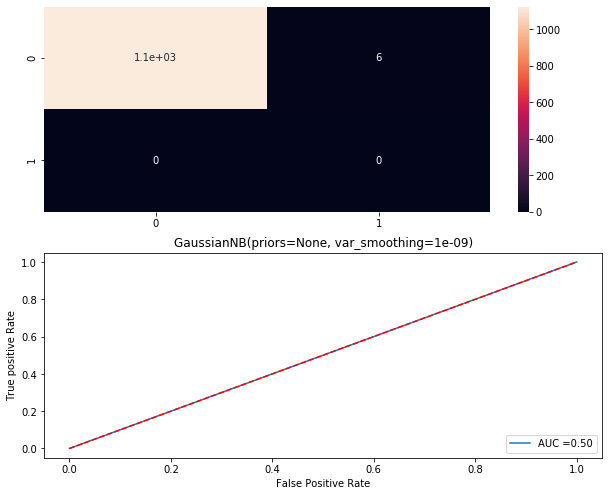

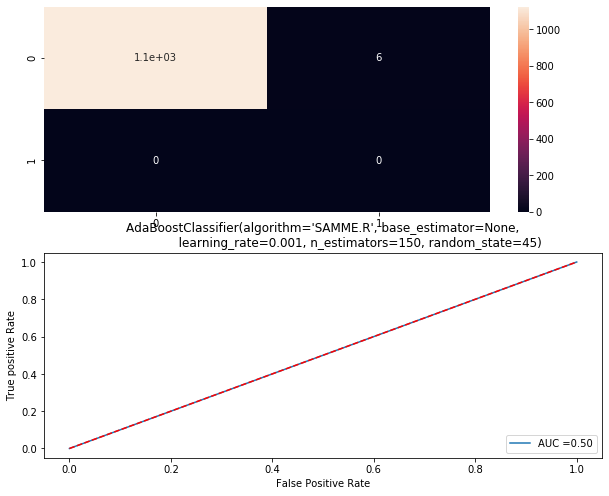

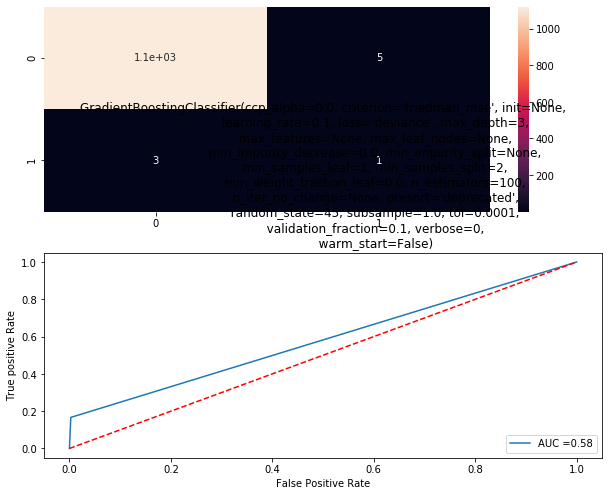

In [27]:
model=[]
score=[]
cvs=[]
rocscore=[]


for i in [LogisticRegression(penalty="l2" ,random_state= 91 ),SVC(C=1 ,kernel ="rbf" ,random_state= 45 ),
          KNeighborsClassifier(n_neighbors= 5 ,algorithm = 'auto' ) ,
          DecisionTreeClassifier(criterion ="gini" , random_state= 99  , max_features = 'sqrt'),
          RandomForestClassifier(criterion ='entropy'  ,random_state= 45 ,max_features = 'auto' ),
          GaussianNB( ),AdaBoostClassifier( learning_rate = 0.001, n_estimators = 150 ,random_state= 45) ,
          GradientBoostingClassifier (random_state= 45)]:  
          
          
        k=i
        model.append(i)
        print("\n")
        print("The model calculation for" ,i,"are:" )
        k.fit(train_x,train_y)
        k.score(train_x,train_y)
        predict =k.predict(test_x)
        print(predict)
        AS=accuracy_score(predict,test_y)
        print("Accuracy Score= " ,AS)
        score.append(AS)
        cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
        print("The CV Score is"  ,cv_score)
        cvs.append(cv_score)
        print("")
        cm=confusion_matrix(predict,test_y)
        print(cm)
        print("")
        print(classification_report(predict,test_y))
        print("\n")
        false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,predict)
        roc_auc=auc(false_positive_rate,true_positive_rate)
        print("roc_auc_score" ,roc_auc)
        rocscore.append(roc_auc)
        print("\n")
        plt.figure(figsize=(10,40))
        plt.subplot(911)
        print(sns.heatmap(cm,annot=True))
        plt.subplot(912)
        plt.title(i)
        plt.plot(false_positive_rate,true_positive_rate,label="AUC =%0.2f" %roc_auc)
        plt.plot([0,1] ,[0,1] ,'r--')
        plt.legend(loc="lower right")
        plt.ylabel('True positive Rate')
        plt.xlabel("False Positive Rate")

# Since AdaBoostClassifier is giving better result so we choose it as final model

In [28]:
ada= AdaBoostClassifier( learning_rate = 0.001, n_estimators = 150 ,random_state= 45)
ada.fit(train_x,train_y)
predict=ada.predict(test_x)
AS=accuracy_score(predict,test_y)
print("Accuracy Score=" ,AS)
cv_score=cross_val_score(ada,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score is", cv_score)

Accuracy Score= 0.9946855624446412
The CV Score is 0.9923812260897422


# Saving the model

In [31]:
from  sklearn.externals import joblib
joblib.dump(ada,"covid55.pkl")

['covid55.pkl']